08 Multiple Linear Regression & Polynomial Regression

Sample Dataset

Dataset berisi diameter, jumlah topping, dan harga sejumlah pizza yang akan ditampung dalam format pandas dataframe. 

In [3]:
#Training Dataset

import pandas as pd

pizza = {'diameter': [6, 8, 10, 14, 18], 
         'n_topping': [2, 1, 0, 2, 0],
         'harga': [7, 9, 13, 17.5, 18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


Import pandas as pd. Ada 3 dataset dictionary, yaitu diameter, jumlah topping, dan harga. Setiap dataset akan mengisi sekumpulan bilangan yang berasosiasi. Dictionary tersebut ditampung dalam variabel pizza yang kemudian dapat digunakan untuk menggunakan data framw dengan memanggil pd.DataFrame(pizza) yang ditampung dalam variabel train_pizza_df.

In [4]:
#Testing Dataset
pizza = {'diameter': [8, 9, 11, 16, 12], 
         'n_topping': [2, 0, 2, 2, 0],
         'harga': [11, 8.5, 15, 18, 11]}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


Testing data set sama persis tahapannya dengan training dataset, hanya saja bilangan tiap datasetnya sudah berbeda. Untuk menampilkan hasilnya maka dengan memanggil variabel test_pizza_df yang memuat pandas dataframe pizza. Data diameter dan topping berperan sebagai feature dan harga sebagai target. 

Preprocessing Dataset

In [5]:
import numpy as np

X_train = np.array(train_pizza_df[['diameter', 'n_topping']])
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_train: [ 7.   9.  13.  17.5 18. ]


Diameter dan topping akan dikonversikan ke dalam numpy array dan ditampung dalam variabel X_train sebagai sekumpulan feature training set dan y_train sebagai sekumpulan data target untuk training set.

In [6]:
X_test = np.array(test_pizza_df[['diameter', 'n_topping']])
y_test = np.array(test_pizza_df['harga'])

print(f'X_test:\n{X_test}\n')
print(f'y_test: {y_test}')

X_test:
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_test: [11.   8.5 15.  18.  11. ]


Prosesnya sama dengan training set. Pada testing set variabel X_test berisi sekumpulan feature dalam testing set.

Dataset yang akan ditampung dalam numpy aray harus import numpy as np. Selanjutnya memisahkan featjres dan targetnya. Features dalam kasus ini adalah diameter dan jumlah topping. Nilai dari features tersebut akan diasosiasikan dengan numpy array dengan memanggil np.array(train_pizza_df[['diameter', 'n_topping']]) yang akan ditampung dalam variabel X_train. Sedangkan kolom harga termasuk ke dalam target pada numpy array dengan memanggil np.array(train_pizza_df['harga']) yang ditamlung dalam variabel y_train untuk mengetehaui target prediksinya. X_train selalu memiliki format array 2 dimensi, sedangkan y_train selalu dengan format array 1 dimensi. Hal yang sama juga dilakukan pada proses testing set dengan mengikuti langkah-langkah seperti training set, tetapi yang menjadi pembeda adalah pada saat memanggil yang awalnya X_train menjadi X_test dan y_train menjadi y_test.

*Multiple Linear Regression*


Merupakan generalisasi dari Simple Linear Regression yang memungkinkan untuk menggunakan beberapa explantory variabel. Perbedaan dari multiple linear regression dan simple linear regression terdapat pada jumlah feature. Pada simple linear hanya menggunakan 1 feature untuk melakukan prediksi nilai, sedangkam pada multiple linear menggunakan lebih dari 1 feature.


- Setiap nilai x akan dikalikan dengan beta

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
print(f'r_squared: {r2_score(y_test, y_pred)}')

r_squared: 0.7701677731318468


Melakukan import model dengan memanggil from sklearn.linear_model import LinearRegression. Sedangkan, untuk memanggil metricsnya maka harus memanggil from sklearn.metrics import r2_score. Kemudian membentuk objek model dengan memanggik LinearRegression() dan ditampung dalam variabel model. Setelah itu, melakukan proses training model dengan memanggil model.fit(X_train, y_train). Selanjutnya setelah menjadi train model, maka akan dilakukan prediksi terhadap feature yang ada dalam testing set dengan memanggil model.predict(X_test) yang kemudian hasilnya akan ditampung dalam variabel y_pred. Hasil prediksi dibutuhkan untuk mengukur performa dengan menggunakan r2_score yang didalamnya terdapat y_test dan y_pred.

*Polynomial Regression*


Memodelkan hubungan antar independent variabel x (feature) dan dependent variabel y (target) sebagai derajat polynomial dalam x. 

In [11]:
#Preprocessing Dataset
X_train = np.array(train_pizza_df['diameter']).reshape(-1, 1)
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train: [ 7.   9.  13.  17.5 18. ]


Feature yang digunakan hanya satu, yaitu diameter pizza dan targetnya adalah harga pizza. Langkah pertama adalah dengan menggunakan numpy array, yaitu np.array(train_pizza_df['diameter"]).reshape(-1, 1) yang ditampung pada variabel X_train. Reshape (-1, 1) dilakukan agar hasilnya akan menjadi array 2 dimensi karena feature yang dimiliki hanya 1 kolom, oleh karena itu dilakukan transform menjadi 2 dimensi dengan menggunakan methkde reshape. Pada array kedua menampung nilai target dengan memanggil np.array(train_pizza_df['harga"]) yang akan ditampung dalam variabel y_train. 


*Polynomial Regression Quadratic*


Membahas derajat polynomial 2 atau quadratic.

- nilai feature nya hanya ada satu yaitu x
- nilai feature yang tunggal tersebut akan kita representasikan dalam format polynomial
- contoh pada kasus ini menggunakan polynomial derajat 2 yang berarti kita akan memiliki $x^1$ dan $x^2$
- $x^1$ akan dikalikan dengan $\beta^1$ dan untuk $x^2$ akan kita kalikan dengan $\beta^2$

*Polynomial Features*



In [13]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')

X_train_quadratic:
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]



Melakukan transformasi feature dari data set yang dimiliki. Langkah pertama adalah mengimport module nya dengan memanggil from sklearn.preprocessing import PolynomialFeatures. Kemudian membentuk objek PolynomialFeatures(degree=2) yang ditampung pada variabel quadratic_feature. Objek tersebut akan digunakan untum proses transformasi unruk feature yang dimiliki dengan memanggil quadratic_feature.fit_transform(X_train) yang akan ditampunh dalam variabel X_train_quadratic. Kemudian X_train_quadratic akan berisi feature yang sudah ditransformasikan ke dalam polynomial features. Hasil quadratic adalah mengubah nilai tunggal menjadi 3 hasil, yaitu [1, 6, 36.] Nilai 1 diperoleh dari x⁰ dalam kasus ini adalah 6 yang dipangkatkan 0 adalah 1. Nilai 6 dipangkatkan 1 adalah 6. Nilai 36 adalah 6 dipangkatkan 2 adalah 36. 


In [14]:
#Training Model

model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

Langkah pertama membentuk objek model, yaitu LinearRegression() yang ditamlung dalam variabel model. Kemudian objek model akan ditraining dengan memanfaatkan nilaibfeatures yang sudaj ditransformasikan ke dalam nilai polynomial dengan memanggil model.fit(X_train, quadratic, y_train)


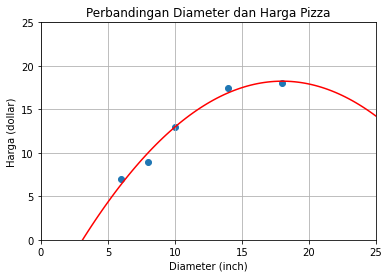

In [15]:
# Visualisasi Model

import matplotlib.pyplot as plt

X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

Import module matpolib.pyplot as plt dengan membentuk sederet bilangan dari 0-25 sebanyak 100 data point yang kemudian data point tersebut akan dimasukkan ke dalam variabel X_vis yang swlanjutnya dikenakan proses transformasi, yaitu quadratic_feature.transform(X_vis) yang akan ditampung dalam variabel X_vis_quadratic. Selanjutnya akan dilakukan prediksi terhadap nilai X_vus_quadratic, yaitu dengan memanggil model.predicr(X_vis_quadratic) yang ditampung pada variabel y_vis_quadratic. Setelah itu melakukan data training dengan visualisasi scatter plot, yaitu dengan memanggil plt.scatter(X_train, y_train) yang akan menghasilkan ke 5 data point pada training set pada kasus ini. Kemudian melakukan ploting, yaitu dengan memanggil plt.plot(X_vis, y_vis_quadratic, '-r') untuk menghasilkan ploting garis melengkung untuk polynomial berwarna merah pada kasus ini. Kemudian ada setting tambahan terkait judul, nama label (x label dan y label), batasan atau limit untum sumbu x dan y, menampilkan plt.grid yang disetting menjadi True, dan plt.show untum memunculkan visualisasinya.

*Polynomial Regression: Quadratic vs Cubic*

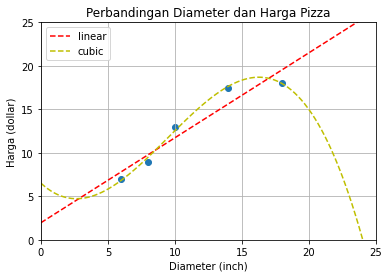

In [19]:
# Training Set (melakukan plotting untuk dataset yang menghasilkan 5 data point untuj training set)
plt.scatter(X_train, y_train)

# Linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--r', label='linear')

# Cubic
cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis, '--y', label='cubic')


plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.legend()
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

- Training Set (melakukan plotting untuk dataset yang menghasilkan 5 data point untuj training set)

- Linear membentuk objek model dengan memanggil LinearRegression() yang ditampung dalam variabel model, kemudian ditraining dengan menggunakan model.fit(X_train, y_train). Selanjutnya menyediakan 100 data point dengan jangkauan yang dimulai dari 0-25 yang menggunakan methode reshape(-1, 1) untuk menghasilkan numpy array 2 dimensi yang akan ditampung pada variabel X_vis. Nilai X_vis akan digunakan sebagai feature untuk melakukan prediksi dengan memanggil model.predict(X_vis) yang ditampung lada variabel y_vis. Setelah itu, hasil prediksinya akan ditabelkan secara visual dengan memanggil plt.plot(X_vis, y_vis, '--r', label='linear') #--r adalah untuk plotting garis putus-putus berwarna merah yang merepresentasikan simple linear regression tertentu

- Quadratic, perbedaannya terdapat hanya pada penerapan PolynomialFeatures(degree=2) yang ditampung pada variabel quadratic_feature yang akan dilakukan transform dengan menggunakan methode fit yang nantinya akan ditampung lada varianel X_train_quadratic. Tahapan selanjutnya adalah memanggil LinearRegression yang ditampung lada objek model yang kemudian akan dilakukan proses training dengan menggunakan feature yang sudah ditransformasikan ke quadratic polynomial dengan menggunakan model.fit(X_train, y_train). Untuk nilai prediksi juga sama akan ditransformasikan menjadi quadratic polynomial yang ditampung pada variabel X_vis_quadratic. Nilai dari X_vis_quadratic akan digunakan untuk melakukan prediksi yang akan diploting dengan garis putus-putus berwarna hijau (--g). G di sini merupakan warna hijau, green. Garis putus-putus berwarna hijau merupakan hasil polynomial quadratic. 

- Cubic, perbedaan pada Cubic terdapat di cubic_feature = PolynomialFeatures(degree=3) sedangjan kangkah selanjutnya akan sama persis seperti pada proses quadratic. Cuby polynomial regression akan diploting sebagai --y yang berarti akan menghasilkan garis putus-putus berwarna kuning (yellow) dengan menyertakan label cubic.

*SUMBER :  https://www.youtube.com/watch?v=nWJUJenAyB8*